In [10]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose

import matplotlib.pyplot as plt

<AxesSubplot:title={'center':'Airline passengers'}, xlabel='Month'>

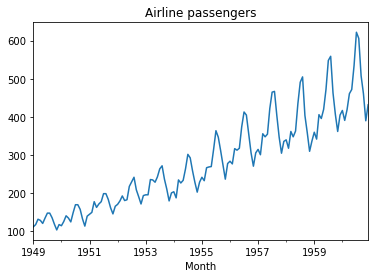

In [7]:
df = pd.read_csv("/Users/bruno/Documents/data/time_series_tutorial/airline-passengers.csv", index_col=0)
df.index = pd.to_datetime(df.index)
y = df["Passengers"]
y.name = "n_passengers"

y.plot(title="Airline passengers")

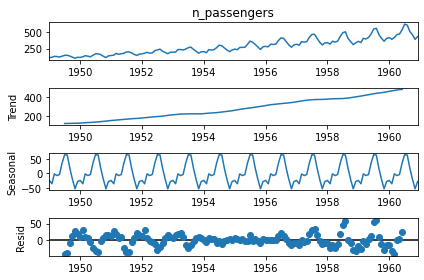

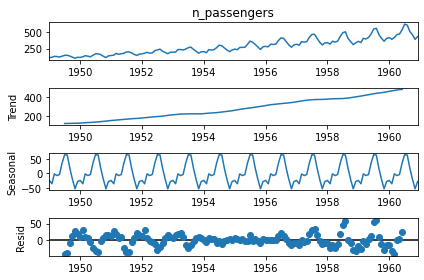

In [11]:
seasonal_decomp = seasonal_decompose(y, model="additive")
seasonal_decomp.plot()

In [26]:
seasonal_df = y.to_frame()

seasonal_df["trend"] = seasonal_df["n_passengers"].rolling(window=13, center=True).mean()

seasonal_df['detrended'] = seasonal_df["n_passengers"] - seasonal_df["trend"]

seasonal_df.index = pd.to_datetime(seasonal_df.index)
seasonal_df['month'] = seasonal_df.index.month
seasonal_df['seasonality'] = seasonal_df.groupby("month")['detrended'].transform('mean')

seasonal_df['resid'] = seasonal_df['detrended'] - seasonal_df['seasonality']
seasonal_df.head(15)


,n_passengers,trend,detrended,month,seasonality,resid
Month,,,,,,
1949-01-01,112,NaN,NaN,1,-30.825175,NaN
1949-02-01,118,NaN,NaN,2,-42.027972,NaN
1949-03-01,132,NaN,NaN,3,-4.139860,NaN
1949-04-01,129,NaN,NaN,4,-6.944056,NaN
1949-05-01,121,NaN,NaN,5,-0.699301,NaN
1949-06-01,135,NaN,NaN,6,37.146853,NaN
1949-07-01,148,125.769231,22.230769,7,64.923077,-42.692308
1949-08-01,148,126.846154,21.153846,8,64.580420,-43.426573
1949-09-01,136,128.615385,7.384615,9,15.636364,-8.251748


array([<AxesSubplot:xlabel='Month'>, <AxesSubplot:xlabel='Month'>,
       <AxesSubplot:xlabel='Month'>, <AxesSubplot:xlabel='Month'>],
      dtype=object)

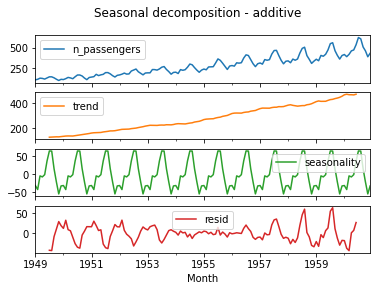

In [27]:
seasonal_df.loc[:, ["n_passengers", "trend", "seasonality", "resid"]].plot(subplots=True, title="Seasonal decomposition - additive")


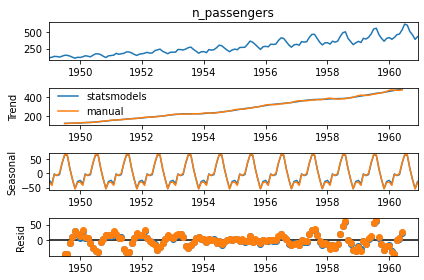

In [28]:
from statsmodels.tsa.seasonal import DecomposeResult 

manual_decomposition = DecomposeResult(
    seasonal=seasonal_df["seasonality"],
    trend=seasonal_df["trend"],
    resid=seasonal_df["resid"],
    observed=seasonal_df["n_passengers"],
)

def add_second_decomp_plot(fig, res, legend):
    axs = fig.get_axes()
    comps = ["trend", "seasonal", "resid"]
    for ax, comp in zip(axs[1:], comps):
        series = getattr(res, comp)
        if comp == "resid":
            ax.plot(series, marker="o", linestyle="none")
        else:
            ax.plot(series)
            if comp == "trend":
                ax.legend(legend, frameon=False)

fig = seasonal_decomp.plot()
add_second_decomp_plot(fig, manual_decomposition, ["statsmodels", "manual"]);